In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Number of actions
k = 10 

# Initialize action values with zero mean and unit variance
action_values = np.random.normal(0, 1, k)

action_values

array([ 1.15968649,  0.12897218,  0.23847352,  0.92783552,  1.85985484,
       -1.07057656, -0.58847751, -0.25763133,  0.14783683, -0.02851225])

In [2]:
np.mean(action_values)

0.25174617255849024

In [3]:
# Adjust action values so as to ensure they have zero mean
action_values-=np.mean(action_values)
action_values

array([ 0.90794032, -0.122774  , -0.01327266,  0.67608935,  1.60810867,
       -1.32232273, -0.84022368, -0.5093775 , -0.10390934, -0.28025843])

In [4]:
np.mean(action_values)

-4.4408920985006264e-17

In [5]:
# Generate rewards for each action based on action values
rewards = {action: np.random.normal(value, 1, 100) for action, value in enumerate(action_values)}
rewards

{0: array([-0.50704557,  1.14521318,  1.62272834,  0.3029504 ,  1.32806791,
         0.88846891,  1.61168177,  1.47022165,  0.65319705,  2.39243307,
         0.29539181, -0.6141039 ,  2.86548429,  1.18869467, -0.29049438,
         0.94568596,  1.79632461,  1.34943306,  0.29788462,  1.12788874,
         1.68715836,  2.77356712,  0.80850644,  0.80581589,  0.61313342,
         0.46423141,  3.18901067,  1.45224561,  1.21130414, -1.11807333,
         1.22241603,  0.59174835,  0.45577335,  0.06565409,  1.11152663,
         2.24858306,  0.66157369,  1.11352689,  0.5972213 ,  1.91738594,
        -0.17572664,  1.72466619, -0.25045748,  2.48130997,  2.36531181,
        -0.55851923,  0.23631982,  0.265313  ,  0.9686559 ,  0.96970277,
        -0.34825586,  1.5486464 ,  0.83459266,  2.54272861, -0.76226271,
        -0.01887135,  1.07895261,  1.98642612,  1.0605124 ,  0.2751702 ,
         0.05645952,  1.263469  ,  0.51383602,  0.19047817,  1.03769638,
         0.14833542,  2.32239395,  0.31205334,  

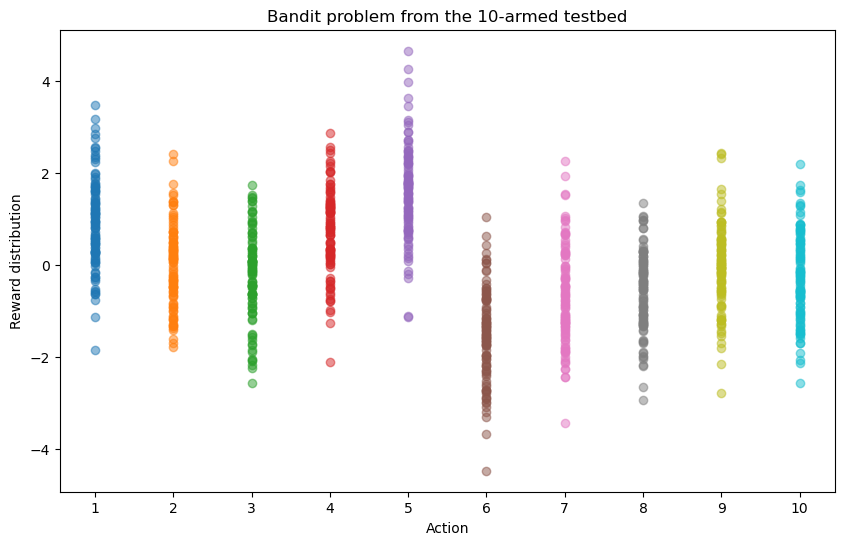

In [6]:
plt.figure(figsize=(10, 6))

# scatter plot for each action's reward distribution
for i in range(k):
    data = rewards[i]
    
    plt.scatter([i+1]*len(data), data, alpha=0.5)

plt.xticks(range(1, k+1))
plt.xlabel('Action')
plt.ylabel('Reward distribution')
plt.title('Bandit problem from the 10-armed testbed')
plt.show()

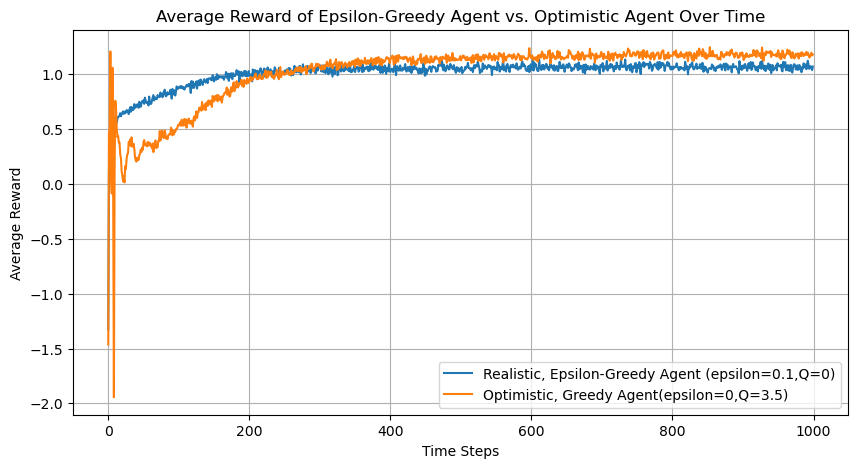

In [7]:
# Exploration rates
epsilon = 0.1
alpha=0.1

# Number of time steps and episodes
time_steps = 1000
episodes = 2000

# Placeholder for average rewards of epsilon-greedy agent and best possible action
avg_rewards = np.zeros(time_steps) 
avg_rewards_OIV= np.zeros(time_steps)

for episode in range(episodes):
        # Initialize action values and counts
        Q1 = np.zeros(k)
        Q2 = np.full(k, 3.5)
#         N2 = np.zeros(k)
#         N1 = np.zeros(k)
        
        for t in range(time_steps):
            
             # Choose action1
            if np.random.rand() < epsilon:
                A1 = np.random.choice(k)  # Explore
            else:
                A1 = np.argmax(Q1)  # Exploit
                
            
            A2 = np.argmax(Q2)  # Exploit
            
            
            # Reward from the reward distribution
            R1 = np.random.choice(rewards[A1])
            R2 = np.random.choice(rewards[A2])
        
            # Update the count of actions
#             N1[A1] += 1
#             N2[A2] += 1

            # Update the estimated value of the chosen action
            Q2[A2] += alpha*(R2 - Q2[A2])
            Q1[A1] += alpha*(R1 - Q1[A1])
        
            # Update the average rewards 
            avg_rewards[t] += R1    
            avg_rewards_OIV[t] += R2
                            
            

avg_rewards/= episodes
avg_rewards_OIV /= episodes   

# Average rewards over time
plt.figure(figsize=(10,5))  # Increase figure size
plt.plot(avg_rewards, label='Realistic, Epsilon-Greedy Agent (epsilon=0.1,Q=0)') 
plt.plot(avg_rewards_OIV, label='Optimistic, Greedy Agent(epsilon=0,Q=3.5)') 
        
plt.xlabel('Time Steps')
plt.ylabel('Average Reward')
plt.grid(True)  # Add gridlines
plt.legend()
plt.title('Average Reward of Epsilon-Greedy Agent vs. Optimistic Agent Over Time')
plt.show()



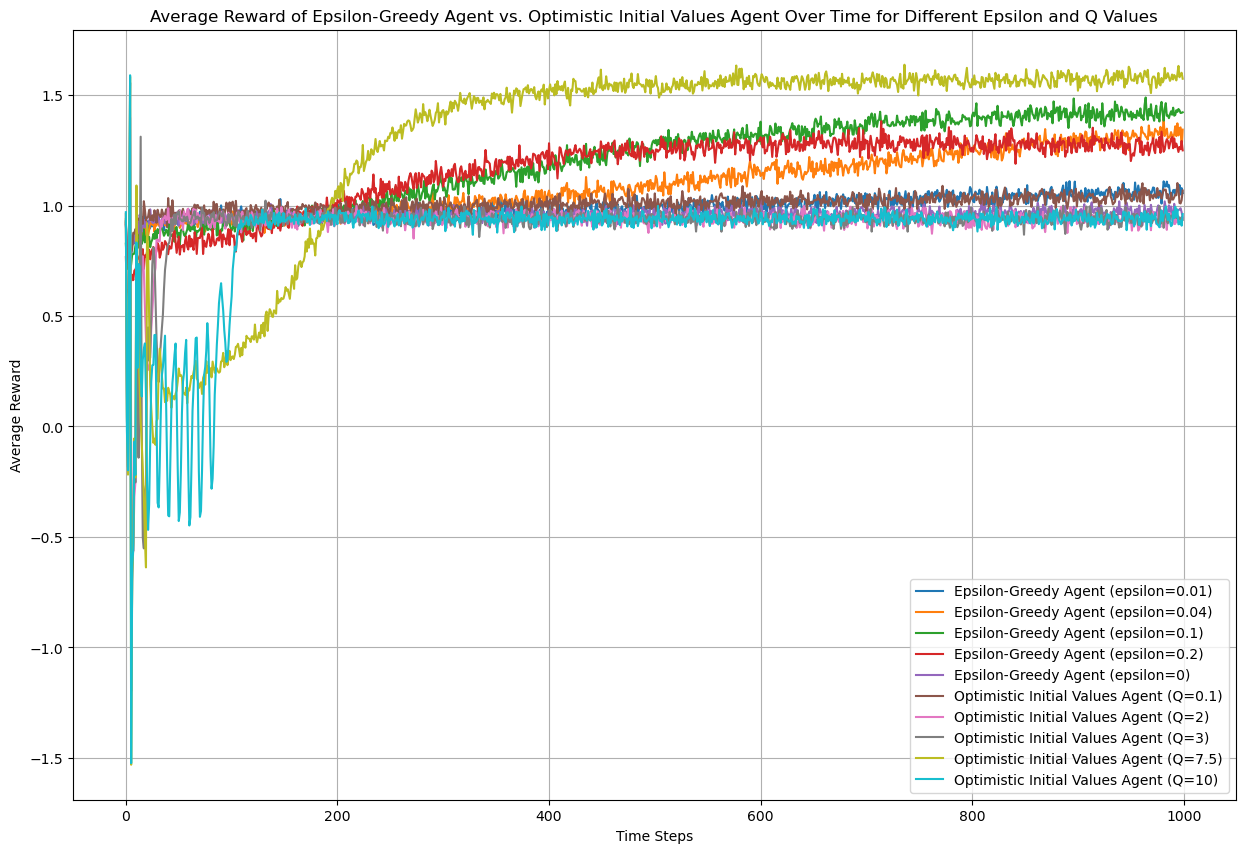

In [7]:
time_steps = 1000
episodes = 2000
k = 10  # Assuming 'k' is the number of actions
alpha = 0.1

# Exploration rates
epsilons = [0.01, 0.04,0.1, 0.2, 0]

# Initial optimistic value estimates
Q_values = [0.1, 2,3, 7.5, 10]

# Initialize average rewards for each epsilon and Q
avg_rewards_epsilon = {eps: np.zeros(time_steps) for eps in epsilons}
avg_rewards_OIV = {Q: np.zeros(time_steps) for Q in Q_values}

# Separate loop for epsilon-greedy agents
for epsilon in epsilons:
    for episode in range(episodes):
        Q = np.zeros(k)
        for t in range(time_steps):
            if np.random.rand() < epsilon:
                action = np.random.choice(k)  # Explore
            else:
                action = np.argmax(Q)  # Exploit
            reward = np.random.choice(rewards[action])
            Q[action] += alpha * (reward - Q[action])
            avg_rewards_epsilon[epsilon][t] += reward
    avg_rewards_epsilon[epsilon] /= episodes

# Separate loop for optimistic initial values agents
for Q_init in Q_values:
    for episode in range(episodes):
        Q = np.full(k, Q_init)
        for t in range(time_steps):
            action = np.argmax(Q)  # Exploit
            reward = np.random.choice(rewards[action])
            Q[action] += alpha * (reward - Q[action])
            avg_rewards_OIV[Q_init][t] += reward
    avg_rewards_OIV[Q_init] /= episodes

# Plotting
plt.figure(figsize=(15, 10))

# Plot for different epsilons
for eps, rewards in avg_rewards_epsilon.items():
    plt.plot(rewards, label=f'Epsilon-Greedy Agent (epsilon={eps})')

# Plot for different Q values
for Q_init, rewards in avg_rewards_OIV.items():
    plt.plot(rewards, label=f'Optimistic Initial Values Agent (Q={Q_init})')

plt.xlabel('Time Steps')
plt.ylabel('Average Reward')
plt.grid(True)
plt.legend()
plt.title('Average Reward of Epsilon-Greedy Agent vs. Optimistic Initial Values Agent Over Time for Different Epsilon and Q Values')
plt.show()


In [ ]:
# time_steps = 1000
# episodes = 2000
# k = 10  # Assuming 'k' is the number of actions
# alpha=0.1

# # Exploration rates
# epsilons = [0.01, 0.04, 0.07, 0.1, 0.2, 0]

# # Initial optimistic value estimates
# Q_values = [1, 3, 4, 6, 10, 25]


# # Initialize average rewards for each epsilon and Q
# avg_rewards_epsilon = {eps: np.zeros(time_steps) for eps in epsilons}
# avg_rewards_OIV = {Q: np.zeros(time_steps) for Q in Q_values}

# for epsilon in epsilons:
#     for Q_init in Q_values:
#         for episode in range(episodes):
#             Q1 = np.zeros(k)
#             Q2 = np.full(k, Q_init)

#             for t in range(time_steps):
#                 # Choose action for epsilon-greedy agent
#                 if np.random.rand() < epsilon:
#                     A1 = np.random.choice(k)  # Explore
#                 else:
#                     A1 = np.argmax(Q1)  # Exploit
                
#                 # Choose action for optimistic initial values agent
#                 A2 = np.argmax(Q2)  # Exploit
                
#                 # Get reward from the reward distribution
#                 R1 = np.random.choice(rewards[A1])
#                 R2 = np.random.choice(rewards[A2])

#                 # Update the estimated value of the chosen action
#                 Q1[A1] += alpha * (R1 - Q1[A1])
#                 Q2[A2] += alpha * (R2 - Q2[A2])
                
#                 # Update the average rewards 
#                 avg_rewards_epsilon[epsilon][t] += R1
#                 avg_rewards_OIV[Q_init][t] += R2

#         # Average rewards over all episodes
#         avg_rewards_epsilon[epsilon] /= episodes
#         avg_rewards_OIV[Q_init] /= episodes

# # Plotting
# plt.figure(figsize=(15, 10))

# # Plot for different epsilons
# for eps, rewards in avg_rewards_epsilon.items():
#     plt.plot(rewards, label=f'Epsilon-Greedy Agent (epsilon={eps})')

# # Plot for different Q values
# for Q_init, rewards in avg_rewards_OIV.items():
#     plt.plot(rewards, label=f'Optimistic Initial Values Agent (Q={Q_init})')

# plt.xlabel('Time Steps')
# plt.ylabel('Average Reward')
# plt.grid(True)
# plt.legend()
# plt.title('Average Reward of Epsilon-Greedy Agent vs. Optimistic Initial Values Agent Over Time for Different Epsilon and Q Values')
# plt.show()
